In [2]:
import numpy as np
import matplotlib.pyplot as plt

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2


from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Lorentzian

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2,get_rp3,integrand_Rd3
from scipy import interpolate

import pandas as pd
from tqdm.notebook import tqdm

In [3]:
seed =11
N = 5000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 4.5
dt = 0.1
t = np.arange(0,10000,dt)
# K = 5.3
K = 7
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega)

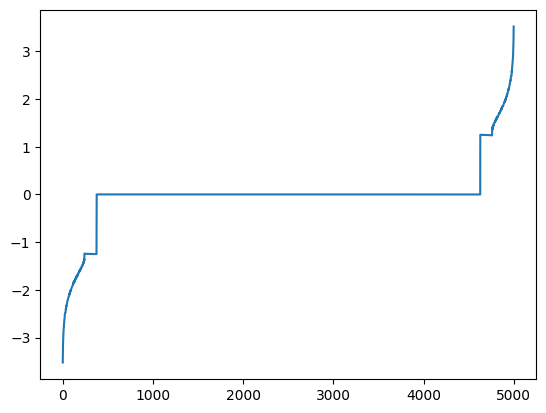

In [96]:
v_t = np.mean(dtheta[-500:],axis=0)
plt.plot(v_t)

In [91]:
con0 = np.abs(v_t) < 0.1 
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))

In [29]:
a_dtheta = []
for i in range(0,len(t)-1000,10):
    d = (theta[i+1000] - theta[i])/(t[i+1000] - t[i])
    a_dtheta.append(d)
a_dtheta = np.array(a_dtheta)

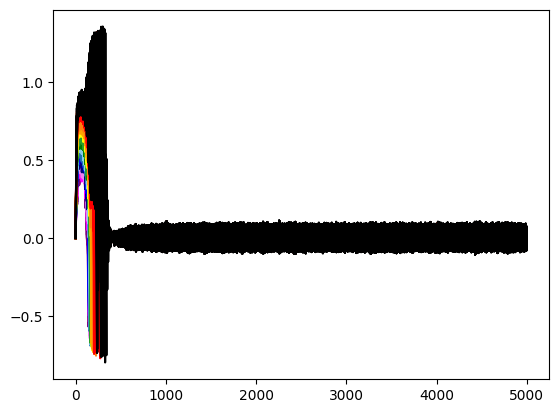

In [74]:
plt.plot(t,dtheta[:,c_0[-140:-130]],color='purple')
plt.plot(t,dtheta[:,c_0[-130:-120]],color='magenta')
plt.plot(t,dtheta[:,c_0[-120:-110]],color='violet')
plt.plot(t,dtheta[:,c_0[-110:-100]],color='navy')
plt.plot(t,dtheta[:,c_0[-100:-90]],color='blue')
plt.plot(t,dtheta[:,c_0[-90:-80]],color='tab:blue')
plt.plot(t,dtheta[:,c_0[-80:-70]],color='skyblue')
plt.plot(t,dtheta[:,c_0[-70:-60]],color='green')
plt.plot(t,dtheta[:,c_0[-60:-50]],color='tab:green')
plt.plot(t,dtheta[:,c_0[-50:-40]],color='yellow')
plt.plot(t,dtheta[:,c_0[-40:-30]],color='orange')
plt.plot(t,dtheta[:,c_0[-30:-20]],color='tab:orange')
plt.plot(t,dtheta[:,c_0[-20:-10]],color='red')
plt.plot(t,dtheta[:,c_0[-10:]],color='black')
# plt.xlim(600,610)
# plt.ylim(0.5,1.1)

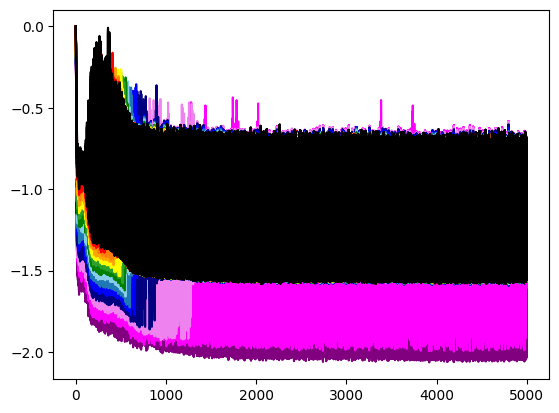

In [73]:
plt.plot(t,dtheta[:,c_m[-140:-130]],color='purple')
plt.plot(t,dtheta[:,c_m[-130:-120]],color='magenta')
plt.plot(t,dtheta[:,c_m[-120:-110]],color='violet')
plt.plot(t,dtheta[:,c_m[-110:-100]],color='navy')
plt.plot(t,dtheta[:,c_m[-100:-90]],color='blue')
plt.plot(t,dtheta[:,c_m[-90:-80]],color='tab:blue')
plt.plot(t,dtheta[:,c_m[-80:-70]],color='skyblue')
plt.plot(t,dtheta[:,c_m[-70:-60]],color='green')
plt.plot(t,dtheta[:,c_m[-60:-50]],color='tab:green')
plt.plot(t,dtheta[:,c_m[-50:-40]],color='yellow')
plt.plot(t,dtheta[:,c_m[-40:-30]],color='orange')
plt.plot(t,dtheta[:,c_m[-30:-20]],color='tab:orange')
plt.plot(t,dtheta[:,c_m[-20:-10]],color='red')

plt.plot(t,dtheta[:,c_m[-10:]],color='black')
# plt.xlim(600,610)
# plt.ylim(0.5,1.1)

(-0.5, -1.8)

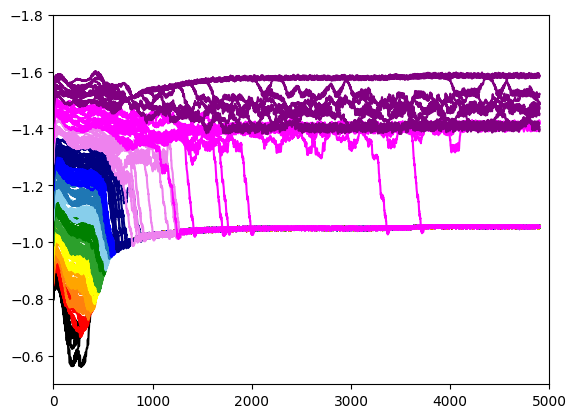

In [69]:
plt.plot(a_dtheta[:,c_m[-10:]],color='black')
plt.plot(a_dtheta[:,c_m[-20:-10]],color='red')
plt.plot(a_dtheta[:,c_m[-30:-20]],color='tab:orange')
plt.plot(a_dtheta[:,c_m[-40:-30]],color='orange')
plt.plot(a_dtheta[:,c_m[-50:-40]],color='yellow')
plt.plot(a_dtheta[:,c_m[-60:-50]],color='tab:green')
plt.plot(a_dtheta[:,c_m[-70:-60]],color='green')
plt.plot(a_dtheta[:,c_m[-80:-70]],color='skyblue')
plt.plot(a_dtheta[:,c_m[-90:-80]],color='tab:blue')
plt.plot(a_dtheta[:,c_m[-100:-90]],color='blue')
plt.plot(a_dtheta[:,c_m[-110:-100]],color='navy')
plt.plot(a_dtheta[:,c_m[-120:-110]],color='violet')
plt.plot(a_dtheta[:,c_m[-130:-120]],color='magenta')
plt.plot(a_dtheta[:,c_m[-140:-130]],color='purple')
plt.xlim(0,5000)
plt.ylim(-0.5,-1.8)

In [97]:
r0 = np.mean(np.exp(1j*theta[-5000:,c_0]),axis=1) * len(c_0)/N
rp_ = np.mean(np.exp(1j*theta[-5000:,c_p]),axis=1) * len(c_p)/N
rm_ = np.mean(np.exp(1j*theta[-5000:,c_m]),axis=1) * len(c_m)/N

rp_ = np.mean(np.abs(rp_))
rm_ = np.mean(np.abs(rm_))

In [32]:
avg_dtheta = (theta[500:] - theta[:-500])/(50)
CS,CMP,cluster,_,_,_,_,_,_ =cluster_os_new2(avg_dtheta[-20:-1],height=0.001,check=2,c_size=1,omega=omega)

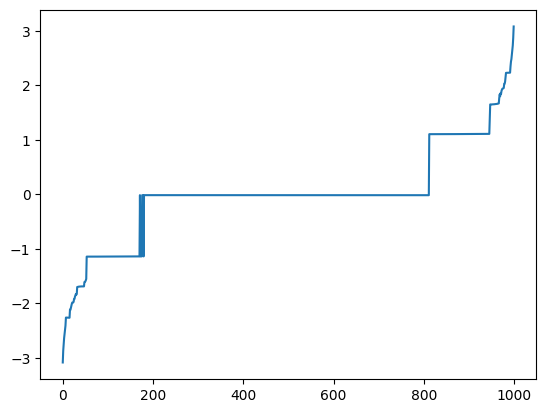

In [33]:
plt.plot(v_t)

In [34]:
r0_2 = np.mean(np.exp(1j*theta[-5000:,cluster[0]]),axis=1) * len(cluster[0])/N
rp_2 = np.mean(np.exp(1j*theta[-5000:,cluster[2]]),axis=1) * len(cluster[2])/N
rm_2 = np.mean(np.exp(1j*theta[-5000:,cluster[1]]),axis=1) * len(cluster[1])/N

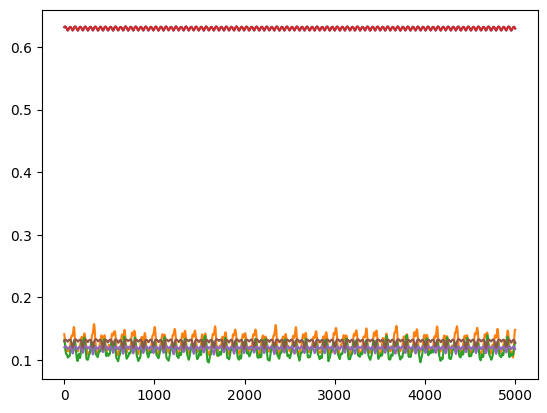

In [39]:
plt.plot(np.abs(r0))
plt.plot(np.abs(rp))
plt.plot(np.abs(rm))
plt.plot(np.abs(r0_2))
plt.plot(np.abs(rp_2))
plt.plot(np.abs(rm_2))

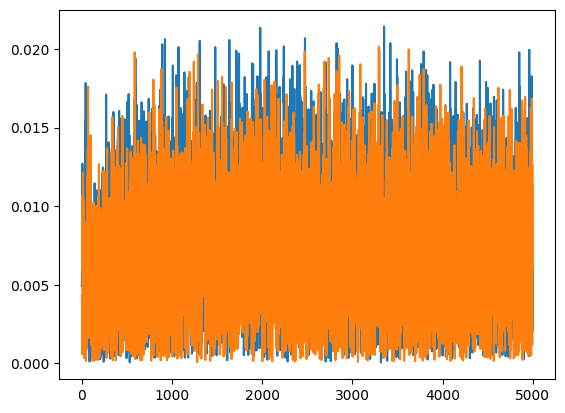

In [97]:
plt.plot(t,np.abs(rp-rm_2))
plt.plot(t,np.abs(rm-rp_2))

## ***check1***
1. $r+$의 값과 $r_{+,drift}$의 값의 차이는 거의 없다. 

만약 논문에서 수정한데로 클러스터와 나머지로 나눌경우랑, 클러스터를 확인해서 나눈 것이랑 큰 차이는 보이지 않는다
2. r_drift의 값은 매우 작은 영향이다.

## CHECK $r_+$ analytical result

In [2]:
m = 6

In [376]:
Ks = np.arange(0,20,0.1)
ms = np.arange(3,10.02,0.1)

In [123]:
RR = {}
RR['u'] = {}
RR['d'] = {}
RR['u']['rp'] = {}
RR['d']['rp'] = {}
RR['u']['rp0'] = {}
RR['d']['rp0'] = {}

RR['u']['R'] = {}
RR['u']['R0'] = {}


In [124]:
RR2 = {}
RR2['u'] = {}
RR2['d'] = {}
RR2['u']['rp'] = {}
RR2['d']['rp'] = {}
RR2['u']['rp0'] = {}
RR2['d']['rp0'] = {}
RR2['u']['R'] = {}
RR2['u']['R0'] = {}


In [125]:
F = get_r_Fun(m)
R_0u = F['u']['R0'](Ks)
idx = np.isnan(R_0u)
K_urp = Ks[~idx]
R_0u = R_0u[~idx]
OPS = F['u']['OPS'](K_urp)
_,rp_d,rp_u,rp0_d,rp0_u = get_rp(K_urp,R_0u,OPS,m,MAX=False)

In [126]:
for m in tqdm(ms):
    F = get_r_Fun(m)
    R_0u = F['u']['R0'](Ks)
    idx = np.isnan(R_0u)
    K_urp = Ks[~idx]
    R_0u = R_0u[~idx]
    OPS = F['u']['OPS'](K_urp)
    _,rp_d,rp_u,rp0_d,rp0_u = get_rp2(K_urp,R_0u,OPS,m,MAX=False)
    NN = np.nan* np.zeros_like(idx)[idx]
    RR['d']['rp'][m] = np.r_[NN,rp_d]
    RR['u']['rp'][m] = np.r_[NN,rp_u]
    RR['d']['rp0'][m] = np.r_[NN,rp0_d]
    RR['u']['rp0'][m] = np.r_[NN,rp0_u]
    RR['u']['R'][m] = F['u']['R'](Ks)
    RR['u']['R0'][m] = F['u']['R0'](Ks)

    _,rp2_d,rp2_u,rp20_d,rp20_u = get_rp3(K_urp,R_0u,OPS,m,MAX=False)
    NN = np.nan* np.zeros_like(idx)[idx]
    RR2['d']['rp'][m] = np.r_[NN,rp2_d]
    RR2['u']['rp'][m] = np.r_[NN,rp2_u]
    RR2['d']['rp0'][m] = np.r_[NN,rp20_d]
    RR2['u']['rp0'][m] = np.r_[NN,rp20_u]
    RR2['u']['R'][m] = F['u']['R'](Ks)
    RR2['u']['R0'][m] = F['u']['R0'](Ks)

  0%|          | 0/71 [00:00<?, ?it/s]

In [132]:
df = pd.DataFrame(RR)
df2 = pd.DataFrame(RR2)

In [150]:
RPU = pd.DataFrame(df['u']['rp'],index=Ks).to_numpy(dtype=float)
RPD = pd.DataFrame(df['d']['rp'],index=Ks).to_numpy(dtype=float)
RPU0 = pd.DataFrame(df['u']['rp0'],index=Ks).to_numpy(dtype=float)
RPD0 = pd.DataFrame(df['d']['rp0'],index=Ks).to_numpy(dtype=float)

In [151]:
RP2U = pd.DataFrame(df2['u']['rp'],index=Ks).to_numpy(dtype=float)
RP2D = pd.DataFrame(df2['d']['rp'],index=Ks).to_numpy(dtype=float)
RP2U0 = pd.DataFrame(df2['u']['rp0'],index=Ks).to_numpy(dtype=float)
RP2D0 = pd.DataFrame(df2['d']['rp0'],index=Ks).to_numpy(dtype=float)

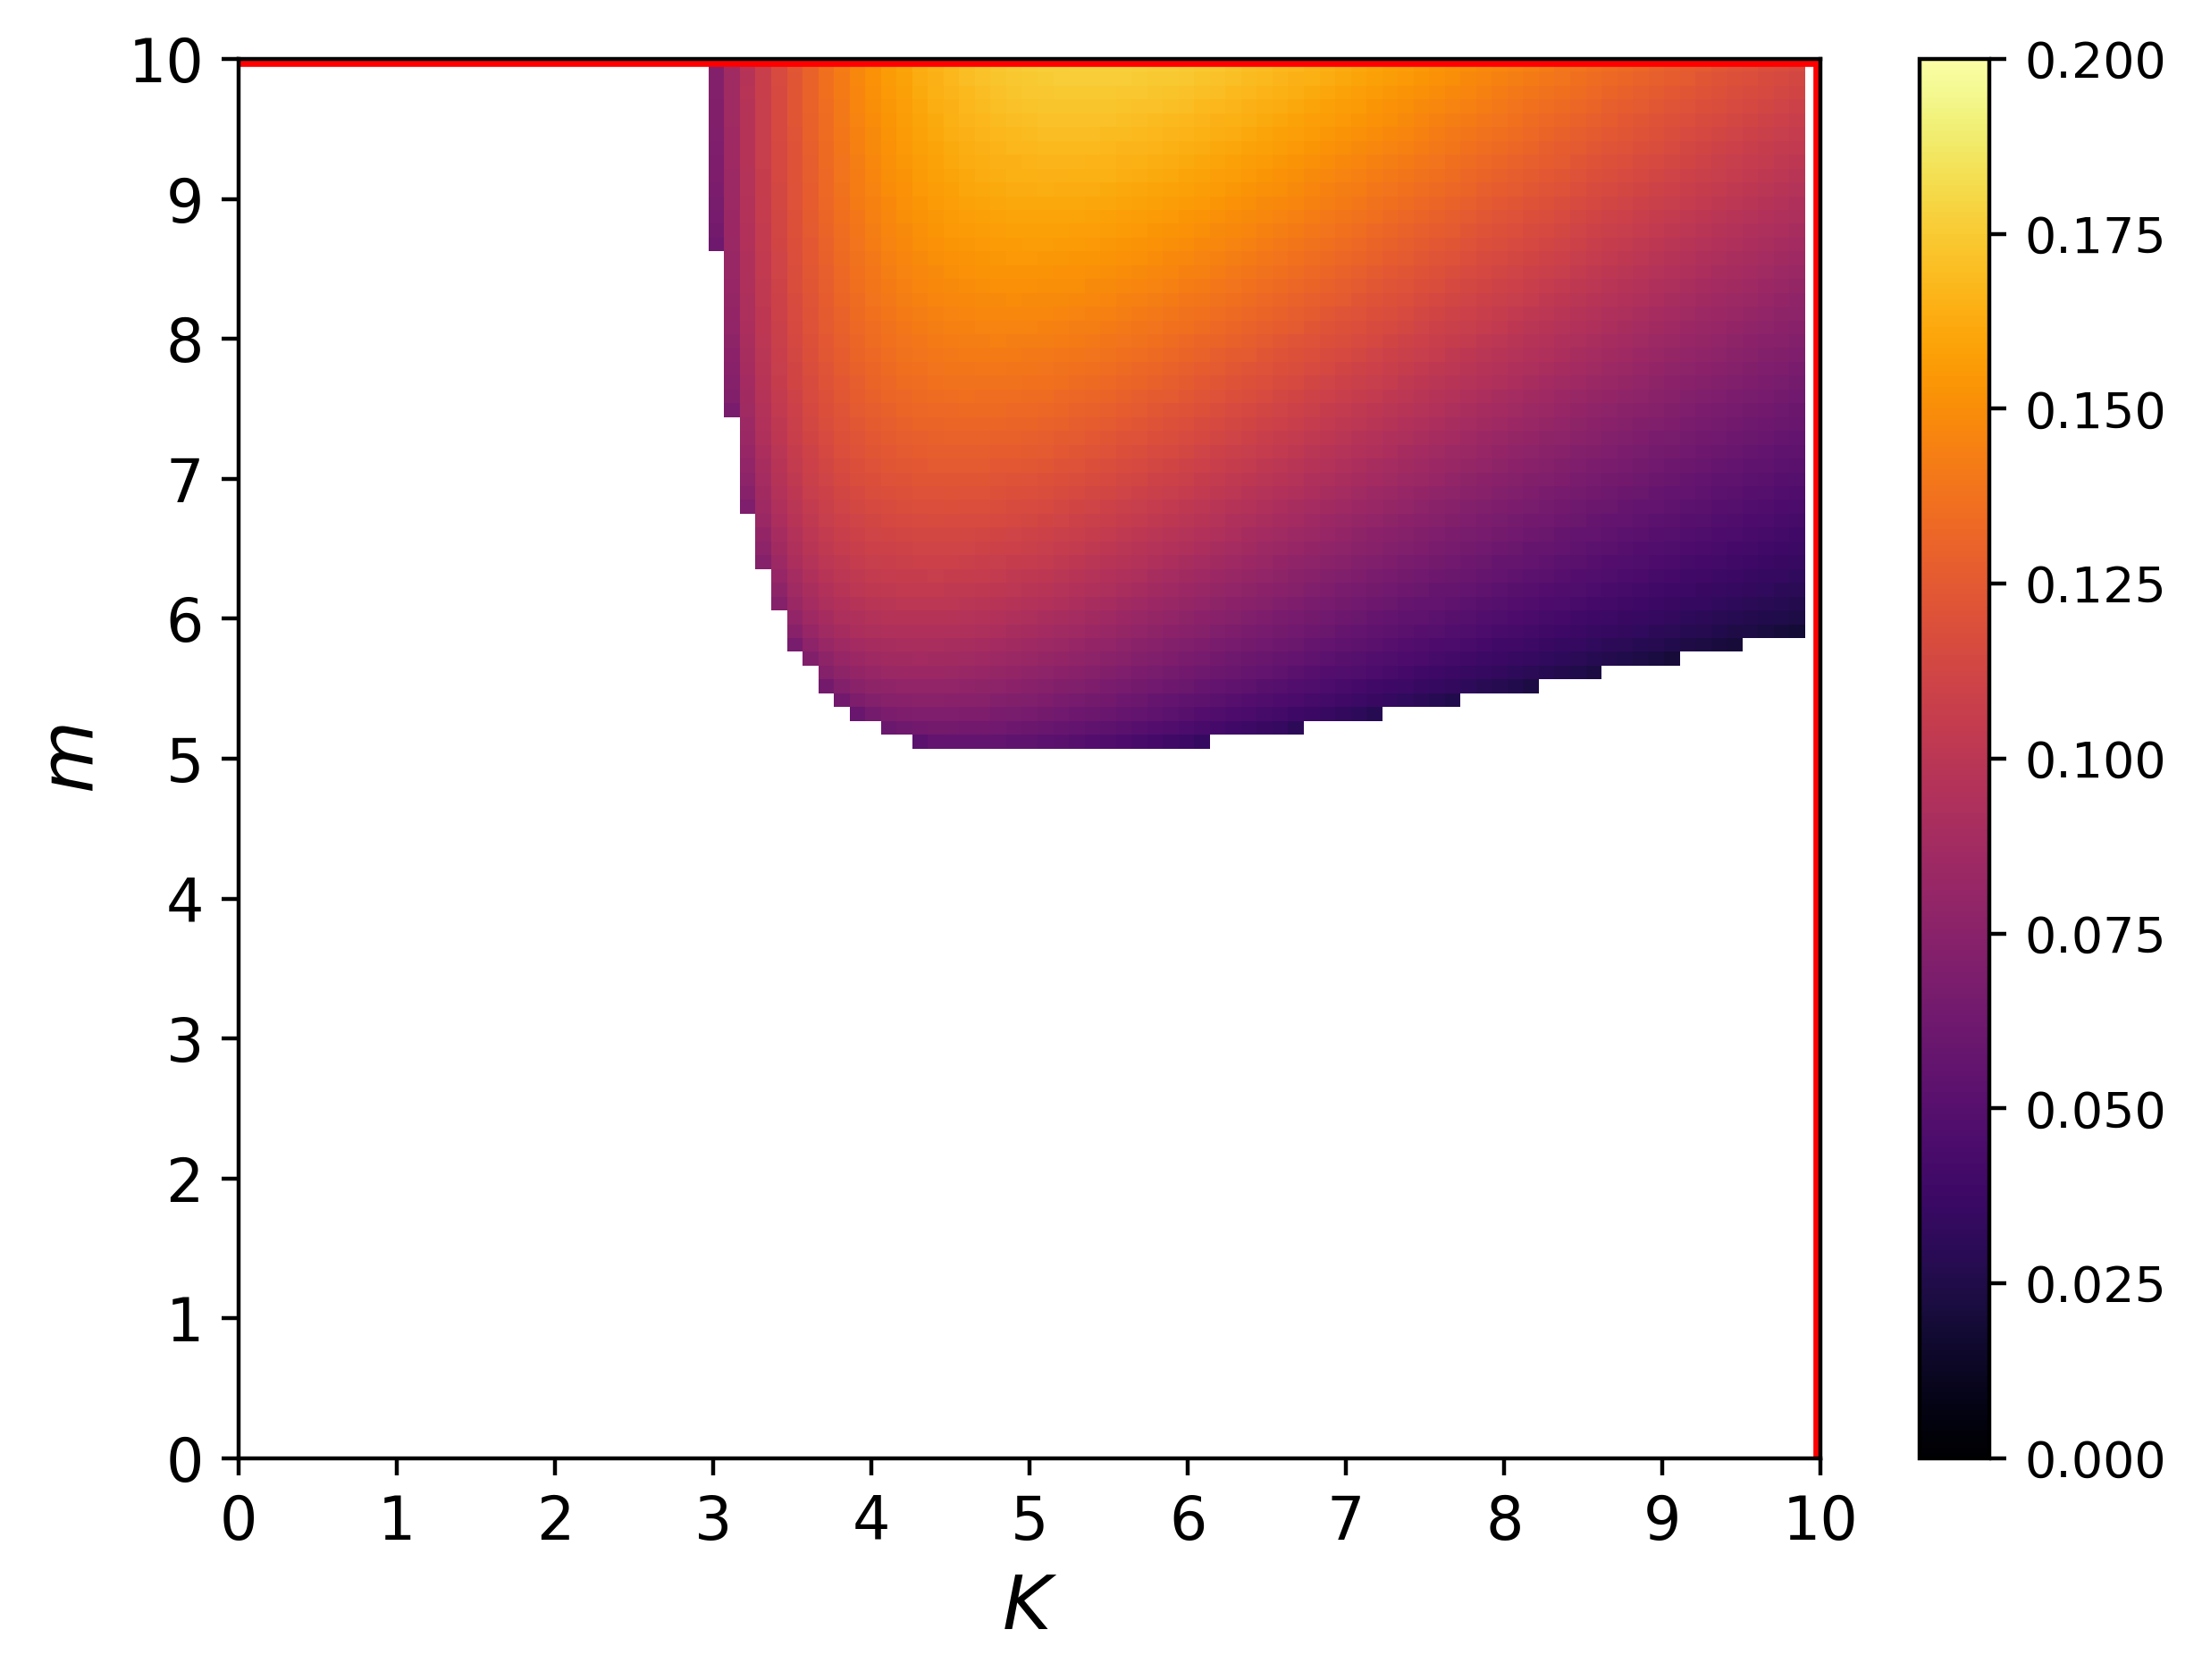

In [165]:
import matplotlib.colors as mcolors
plt.figure(dpi=400)
# imshow를 사용하여 RP2U-RPU의 차이를 시각화
# plt.imshow(RP2U.T, origin='lower',cmap='Blues', aspect='auto', extent=[Ks.min(), Ks.max(), ms.min(), ms.max()])
plt.imshow(RP2U.T, origin='lower',cmap='inferno', aspect='auto', extent=[Ks.min(), Ks.max(), ms.min(), ms.max()],vmax=0.2,vmin=0)
plt.colorbar()

# x축과 y축의 tick 설정
plt.xticks(np.linspace(Ks.min(), 10, num=11))
plt.yticks(np.linspace(0, 10, num=11))

# contour 라인을 여러 개 그리기
# contour_levels = np.logspace(-3, 0, 10)  # 원하는 contour 레벨 설정
# contour_colors = ['white', 'red', 'blue', 'green', 'yellow', 'cyan', 'magenta', 'black', 'orange', 'purple']
# im = plt.contour(Ks, ms, (RP2U - RPU).T, levels=contour_levels, colors=contour_colors)

# colorbar 추가
# plt.clabel(im, inline=True, fontsize=10, colors='black')
plt.hlines(10,0,10,color='red',lw=3)
plt.vlines(10,0,10,color='red',lw=3)
plt.xlim(0,10)
plt.ylim(0,10)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [152]:
# RPU = np.nan_to_num(RPU,0) 
# RP2U = np.nan_to_num(RP2U,0) 
DD = (RPU - RP2U).T
DD = np.nan_to_num(DD,0)

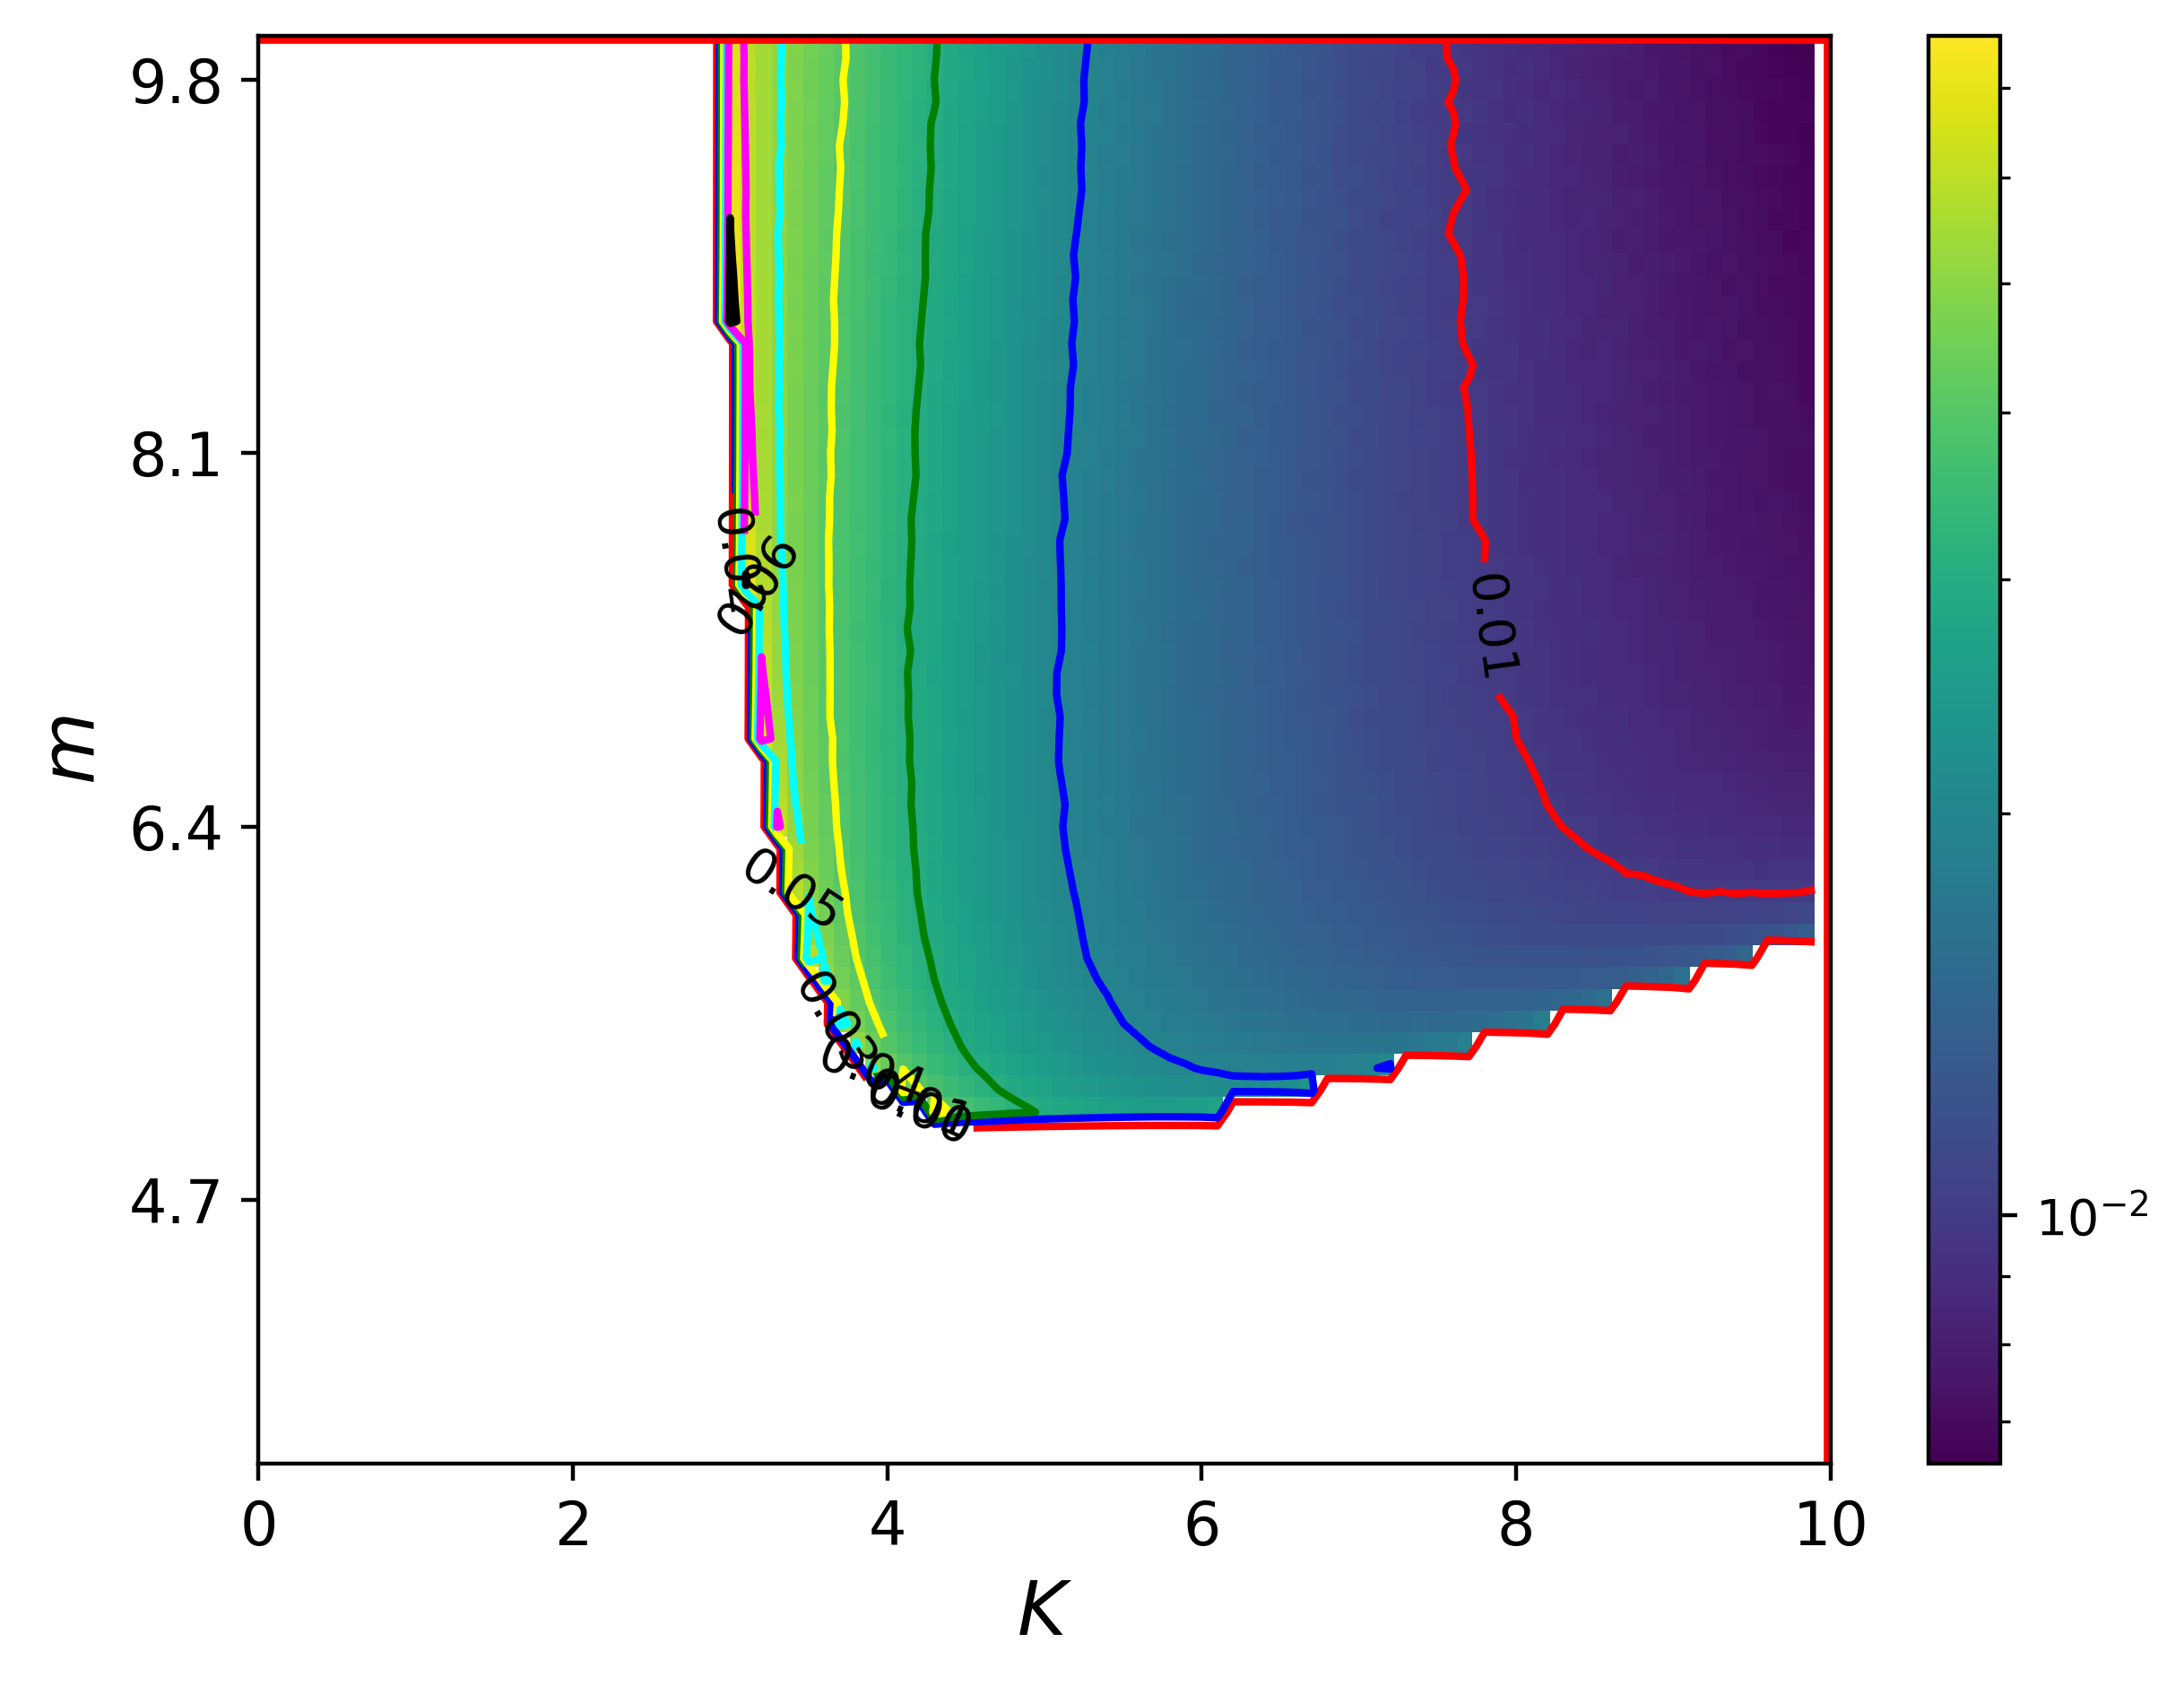

In [163]:
import matplotlib.colors as mcolors
plt.figure(dpi=400)
# imshow를 사용하여 RP2U-RPU의 차이를 시각화
plt.imshow(DD, origin='lower', aspect='auto',norm=mcolors.LogNorm(), extent=[Ks.min(), Ks.max(), ms.min(), ms.max()])
plt.colorbar()

# x축과 y축의 tick 설정
plt.xticks(np.linspace(Ks.min(), 20, num=11))
plt.yticks(np.linspace(ms.min(), 20, num=11))

# contour 라인을 여러 개 그리기
# contour_levels = np.logspace(-3, 0, 8)  # 원하는 contour 레벨 설정
contour_levels = np.linspace(0.0,0.1,11)  # 원하는 contour 레벨 설정
contour_colors = ['white', 'red', 'blue', 'green', 'yellow', 'cyan', 'magenta', 'black', 'orange', 'purple']
im = plt.contour(Ks, ms, DD, levels=contour_levels, colors=contour_colors)

# colorbar 추가
plt.clabel(im, inline=True, fontsize=10, colors='black')
plt.hlines(10,0,10,color='red',lw=3)
plt.vlines(10,3.5,10,color='red',lw=3)
plt.xlim(0,10)
plt.ylim(3.5,10)
plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$m$',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [156]:
diff = {}

In [154]:
F_rp = interpolate.interp1d(Ks_,rp_u,bounds_error=False)
F_rp2 = interpolate.interp1d(Ks_,rp2_u,bounds_error=False)

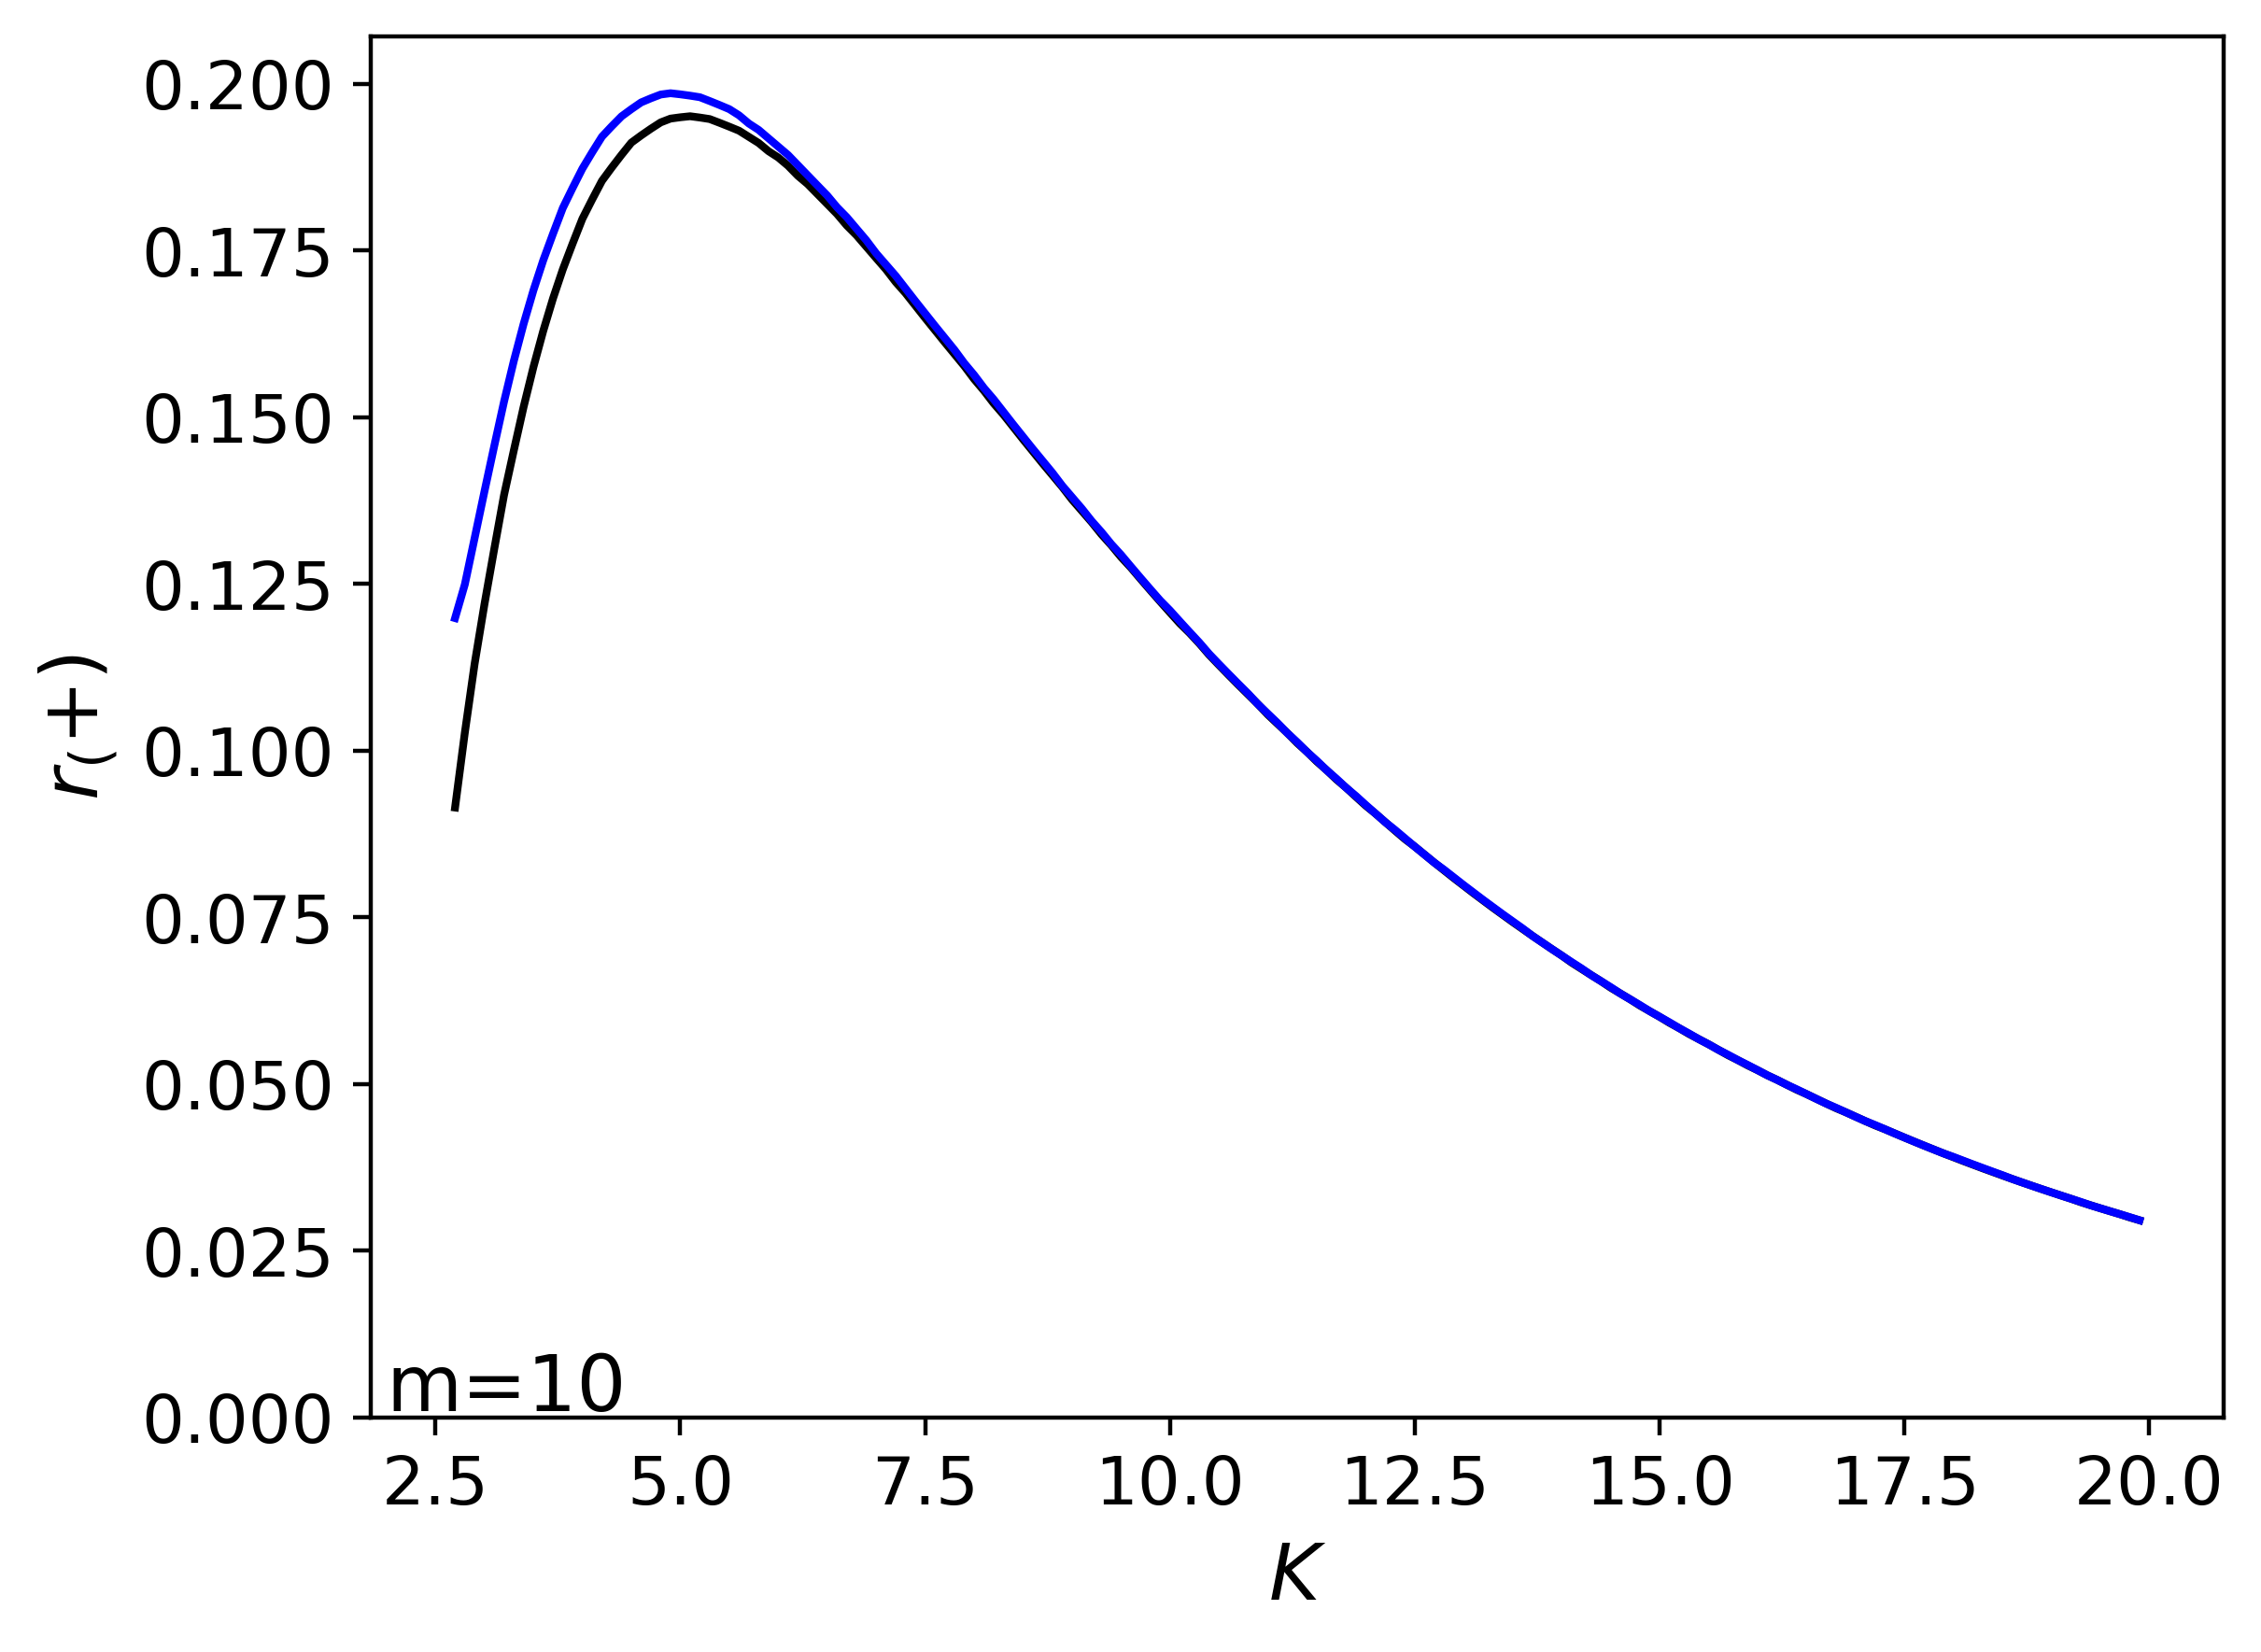

In [155]:
plt.figure(dpi=400)
plt.plot(Ks_,rp_u,color='black')
# plt.plot(Ks_,rp0_u,color='gray')
plt.plot(Ks_,rp2_u,color='blue')
# plt.plot(Ks_,rp20_u,color='skyblue')

plt.ylabel(r'$r_(+)$',fontsize=15)
plt.xlabel(r'$K$',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,)
plt.text(2,0.001,rf'm={m}',fontsize=15)
plt.show()
# plt.scatter(K,np.abs(np.mean(np.abs(rp[-100:]))))
# plt.scatter(K,np.abs(np.mean(np.abs(rm[-100:]))))

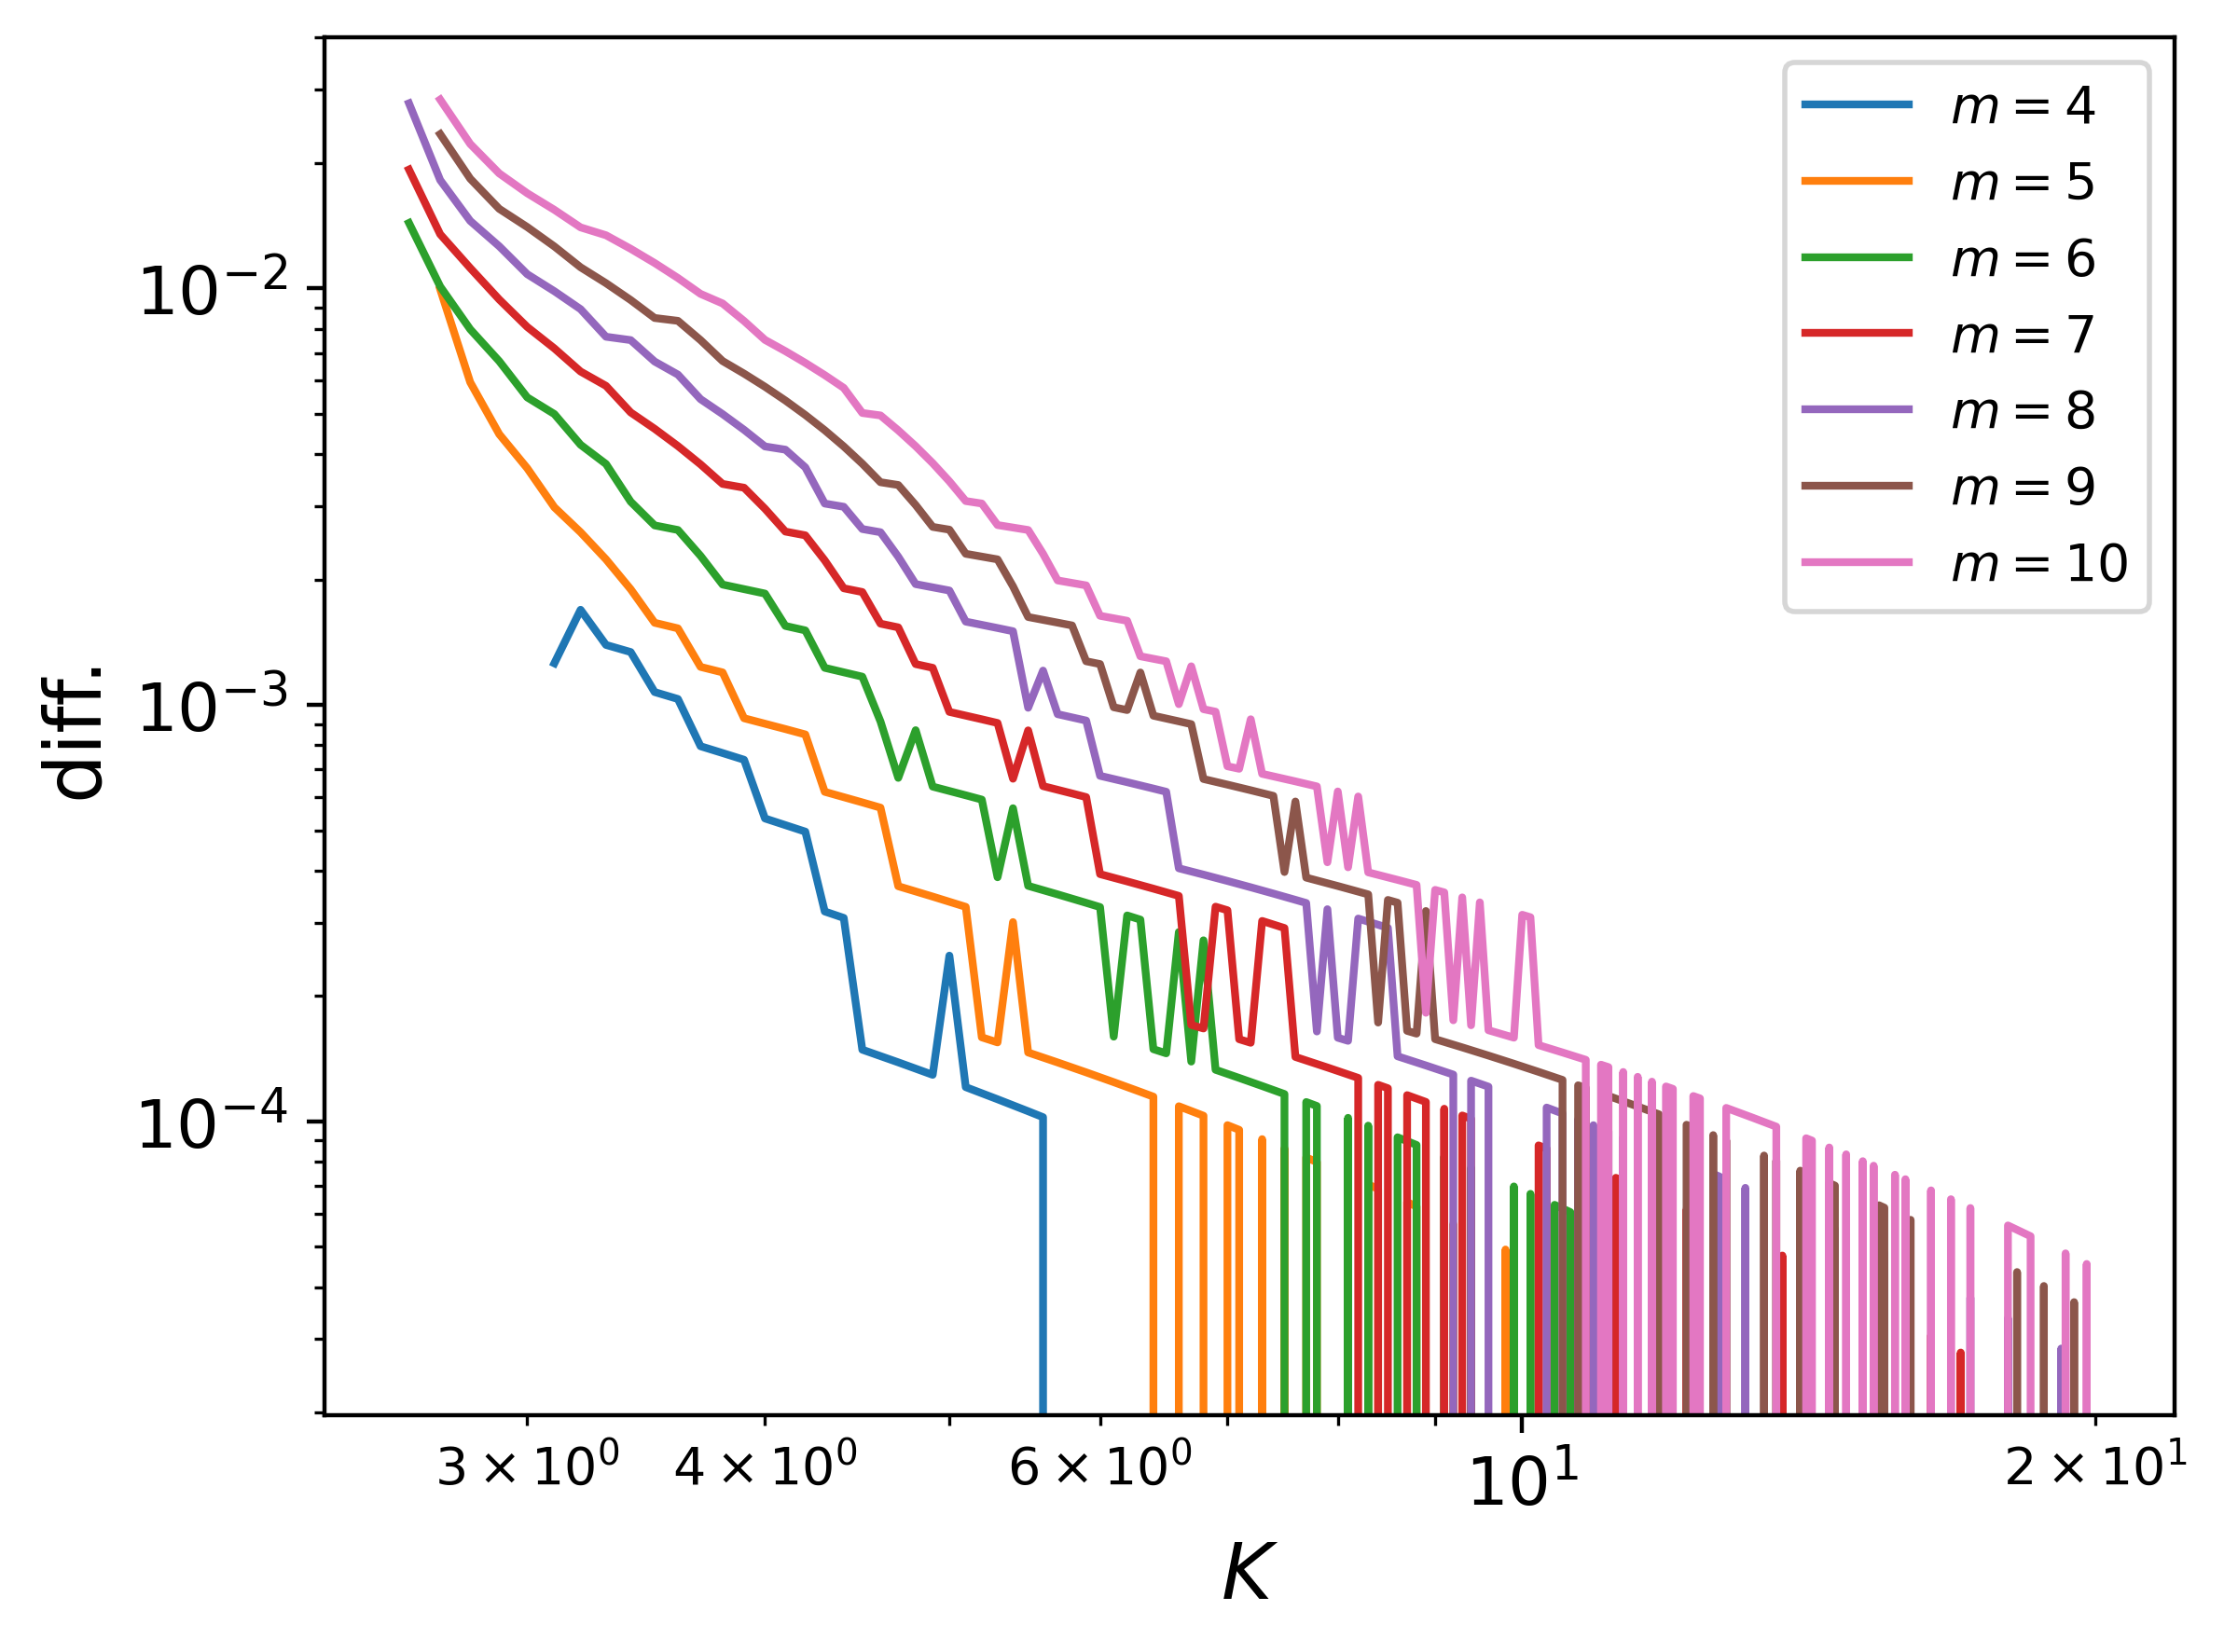

In [176]:
plt.figure(dpi=400)
for m in [4,5,6,7,8,9,10]:
    plt.plot(diff[m,'K'],diff[m,'rp2']-diff[m,'rp'],label=rf'$m={m}$')

plt.legend()
plt.ylabel(r'diff.',fontsize=15)
plt.xlabel(r'$K$',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.ylim(0,)
# plt.yscale('log')
plt.loglog()
# plt.text(2,0.001,rf'm={m}',fontsize=15)
plt.show()
# plt.scatter(K,np.abs(np.mean(np.abs(rp[-100:]))))
# plt.scatter(K,np.abs(np.mean(np.abs(rm[-100:]))))

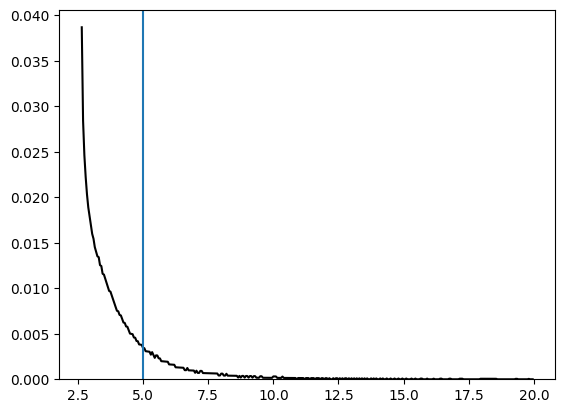

In [103]:
plt.plot(Ks,rp2_u-rp_u,color='black')
# plt.yscale('log')
# plt.xscale('log')
plt.ylim(0,)
plt.axvline(5)
# plt.plot(Ks,,color='blue')


# Check finite size effect

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mK as mK
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Lorentzian

from TO_sim.get_cluster import cluster_os_new2
from TO_sim.get_sec_r import get_r_Fun,get_rp,get_rp2,get_rp3,integrand_Rd3
from scipy import interpolate

import pandas as pd
from tqdm.notebook import tqdm

In [330]:
R = {}

In [331]:
Ns = [250, 500, 1000, 1500, 2000, 4000, 10000, 20000, 30000, 40000]
num = 0
Ns[num]

250

In [357]:
seed =11
N = 10000
print(N)
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)
num+=1
omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 7
dt = 0.1
t = np.arange(0,10000,dt)
# K = 5.3
K = 7
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega,result_time=99000)

v_t = (theta[-1] - theta[-1000])/(t[-1] - t[-1000])
con0 = np.abs(v_t) < 0.1 
c_0, = np.where(con0)
c_p, = np.where(np.logical_and(~con0, omega > 0))
c_m, = np.where(np.logical_and(~con0, omega < 0))

10000


0.08610605940301513


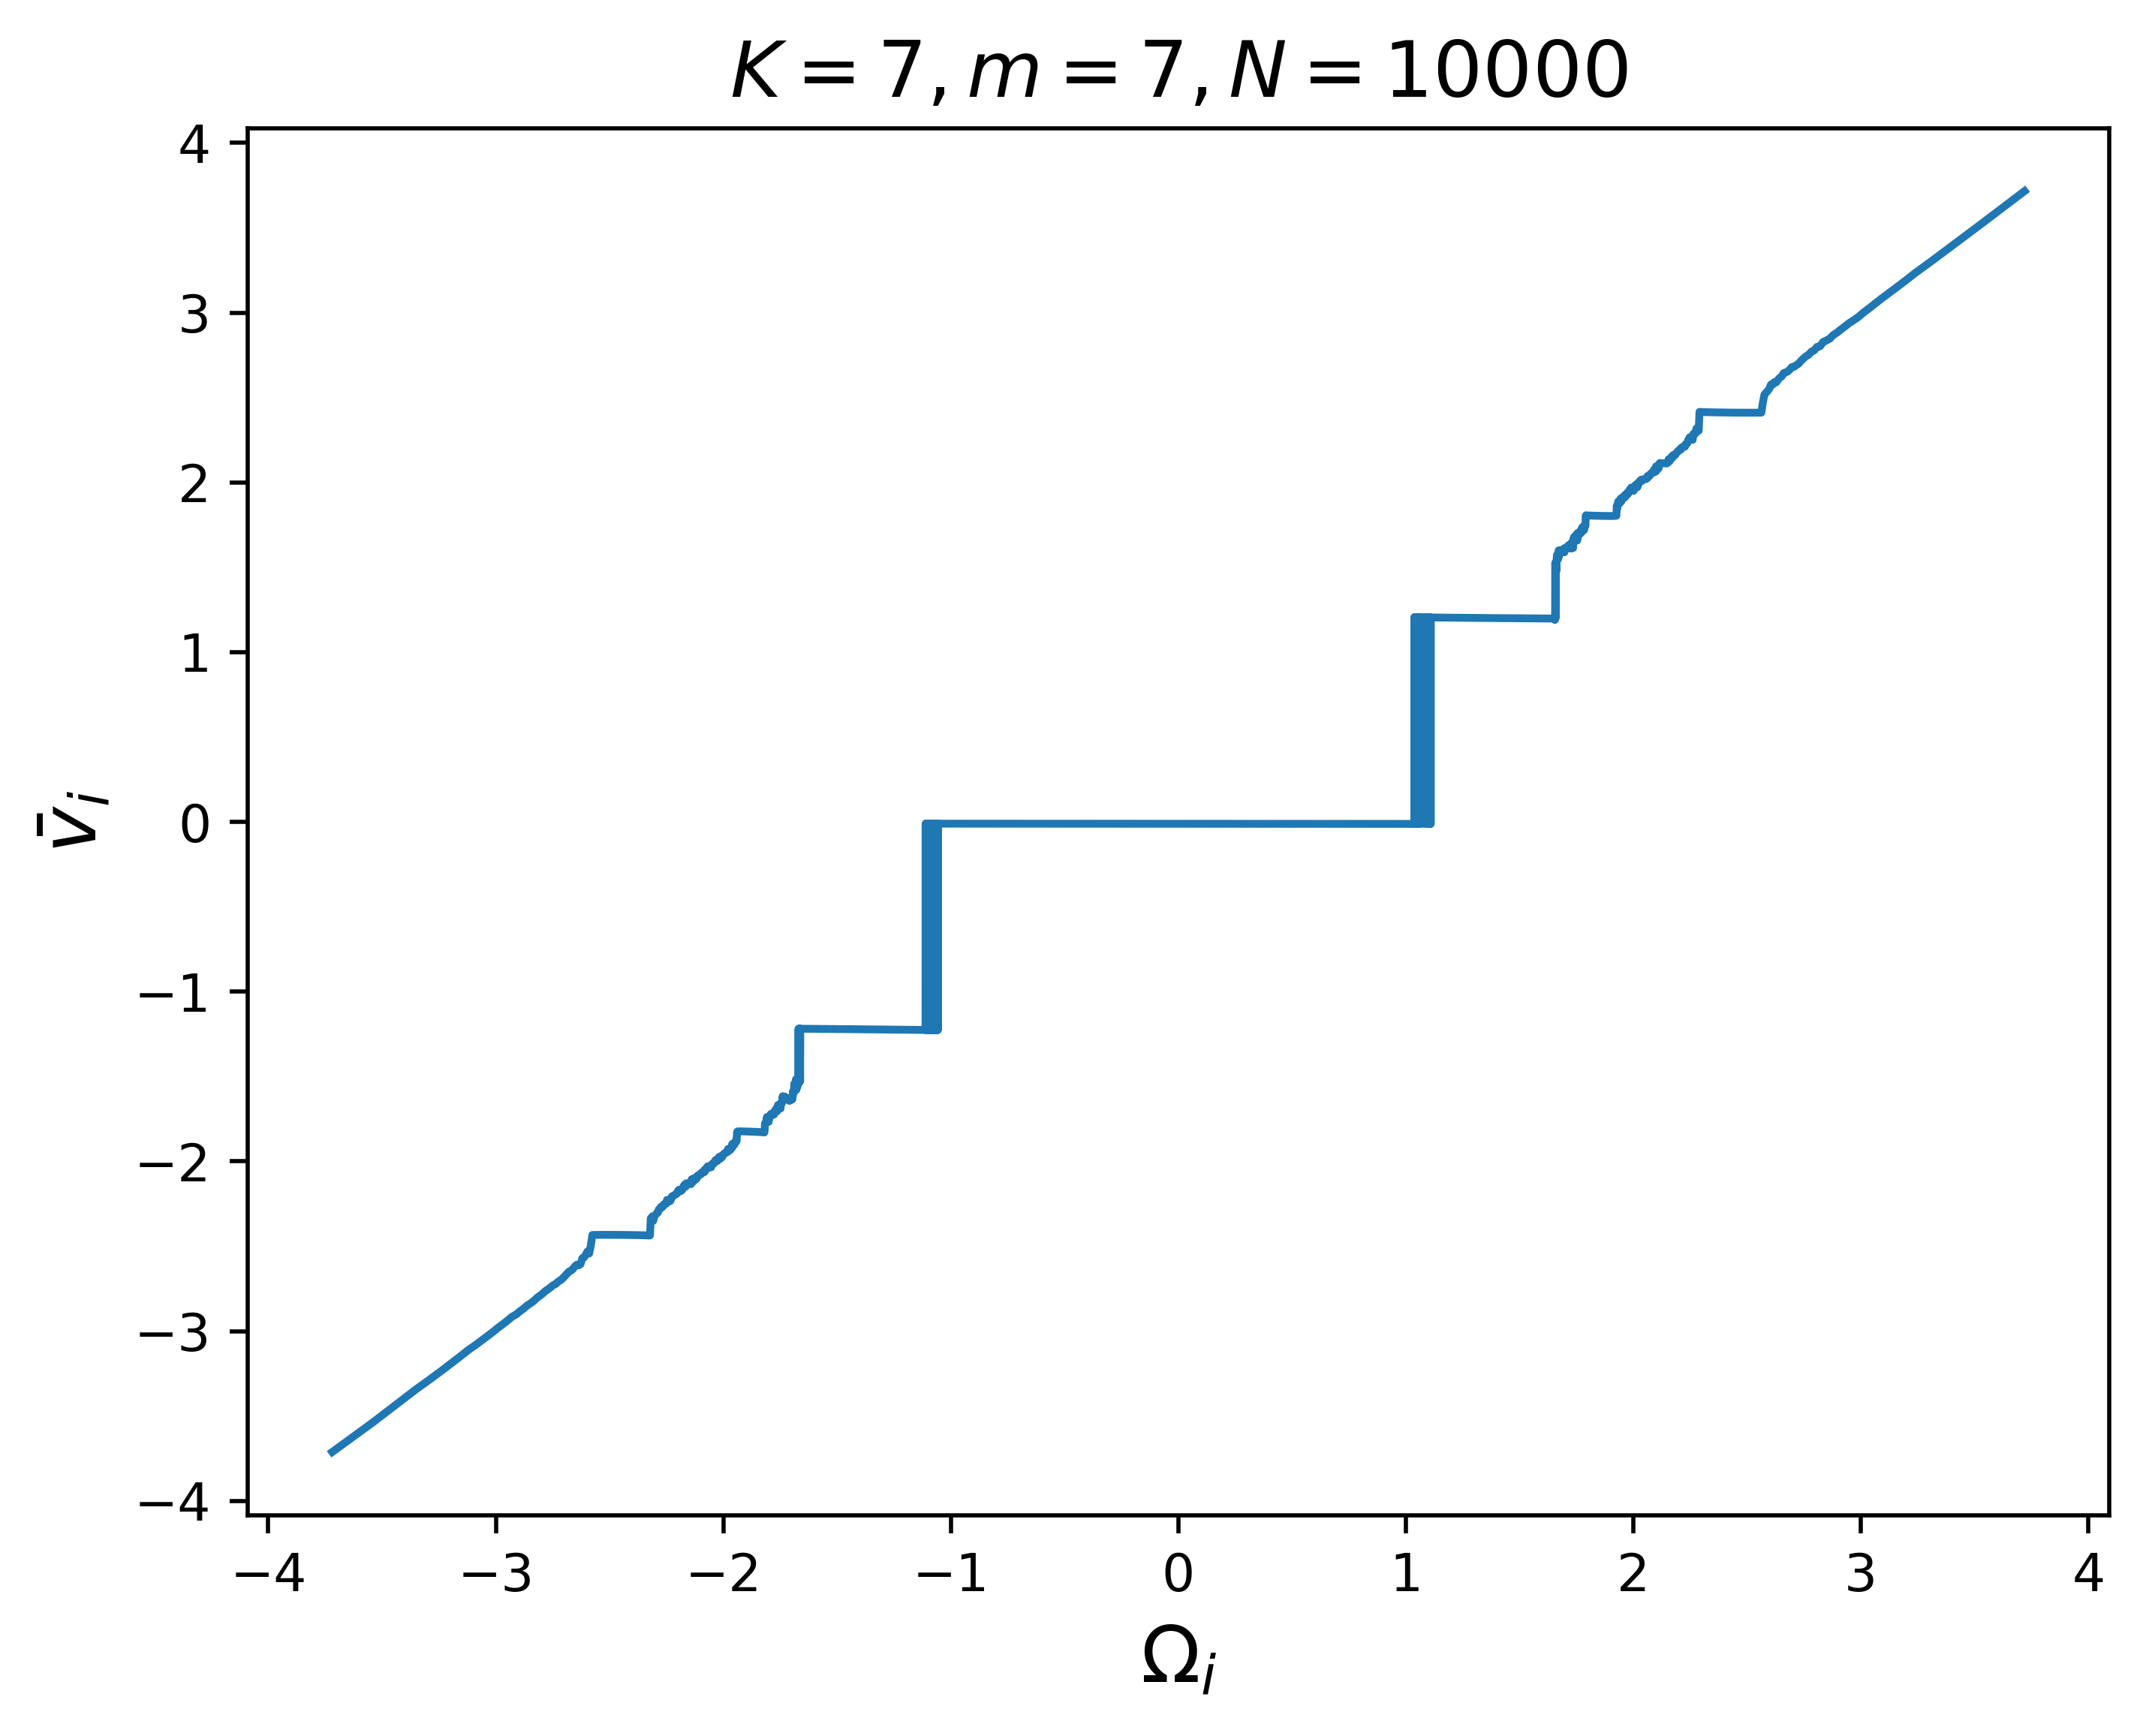

In [358]:
plt.figure(dpi=500)
plt.plot(omega,v_t)
R0 = np.mean(np.exp(1j*theta[-5000:,c_0]),axis=1) * len(c_0)/N
Rp = np.mean(np.exp(1j*theta[-5000:,c_p]),axis=1) * len(c_p)/N
Rm = np.mean(np.exp(1j*theta[-5000:,c_m]),axis=1) * len(c_m)/N

r0_ = np.mean(np.abs(R0))
rp_ = np.mean(np.abs(Rp))
rm_ = np.mean(np.abs(Rm))
plt.xlabel(r'$\Omega_i$',fontsize=15)
plt.ylabel(r'$\bar{v}_i$',fontsize=15)
plt.title(rf'$K={K}, m={m}, N={N}$',fontsize=15)
R[N] = {}
R[N]['0'],R[N]['+'],R[N]['-'] = r0_,rp_,rm_
print(rm_)

250
0.020485128652959848
500
0.055194365080574
1000
0.09206133821023031
1500
0.09238244500710419
2000
0.07123511135013864
4000
0.1062066658500827
10000
0.08610605940301513
20000
0.08944940301926614
30000
0.02576738183686573
40000
0.08729341961033618


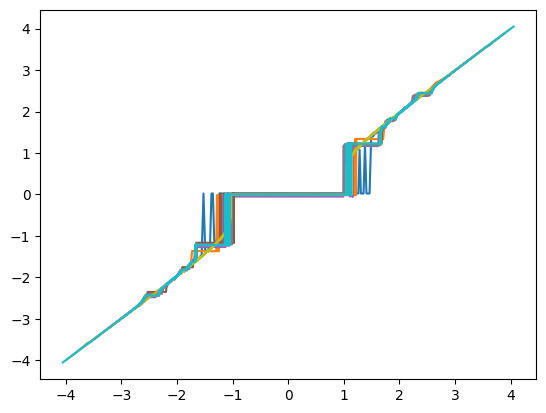

In [332]:
for i in Ns:
    seed =11
    N = Ns[num]
    print(N)
    theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
    # theta_random,omega,Kc = Q_Lorentzian(N,0,1,seed=seed)
    num+=1
    omega = omega - np.mean(omega)
    omega = np.sort(omega)
    m = 7
    dt = 0.1
    t = np.arange(0,10000,dt)
    # K = 5.3
    K = 7
    to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
    theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=0*omega,p_omega=omega,result_time=99000)

    v_t = (theta[-1] - theta[-1000])/(t[-1] - t[-1000])
    con0 = np.abs(v_t) < 0.1 
    c_0, = np.where(con0)
    c_p, = np.where(np.logical_and(~con0, omega > 0))
    c_m, = np.where(np.logical_and(~con0, omega < 0))
    plt.plot(omega,v_t)
    R0 = np.mean(np.exp(1j*theta[-5000:,c_0]),axis=1) * len(c_0)/N
    Rp = np.mean(np.exp(1j*theta[-5000:,c_p]),axis=1) * len(c_p)/N
    Rm = np.mean(np.exp(1j*theta[-5000:,c_m]),axis=1) * len(c_m)/N

    r0_ = np.mean(np.abs(R0))
    rp_ = np.mean(np.abs(Rp))
    rm_ = np.mean(np.abs(Rm))
    R[N] = {}
    R[N]['0'],R[N]['+'],R[N]['-'] = r0_,rp_,rm_
    print(rm_)

In [377]:
m = 10
F = get_r_Fun(m)
R_0u = F['u']['R0'](Ks)
idx = np.isnan(R_0u)
K_urp = Ks[~idx]
R_0u = R_0u[~idx]
OPS = F['u']['OPS'](K_urp)
Ks_,rp_d,rp,rp0_d,rp0_u = get_rp(K_urp,R_0u,OPS,m,MAX=False)
Ks_,rp2_d,rp2,rp20_d,rp20_u = get_rp2(K_urp,R_0u,OPS,m,MAX=False)
Ks_,rp2_d,rp3,rp20_d,rp20_u = get_rp3(K_urp,R_0u,OPS,m,MAX=False)


In [378]:
F_Krp = interpolate.interp1d(Ks_,rp2,bounds_error=False)
F_Krp3 = interpolate.interp1d(Ks_,rp3,bounds_error=False)

(0.0, 1.0)

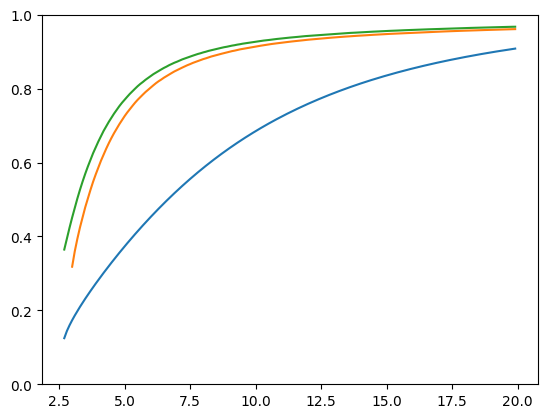

In [379]:
plt.plot(Ks_,F['u']['R0'](Ks_))
plt.plot(Ks_,F['u']['R0'](Ks_)+rp3*2)
plt.plot(Ks_,F['u']['R0'](Ks_)+rp2*2)
plt.ylim(0,1)

Text(0, 0.5, '$r_{(+)}$')

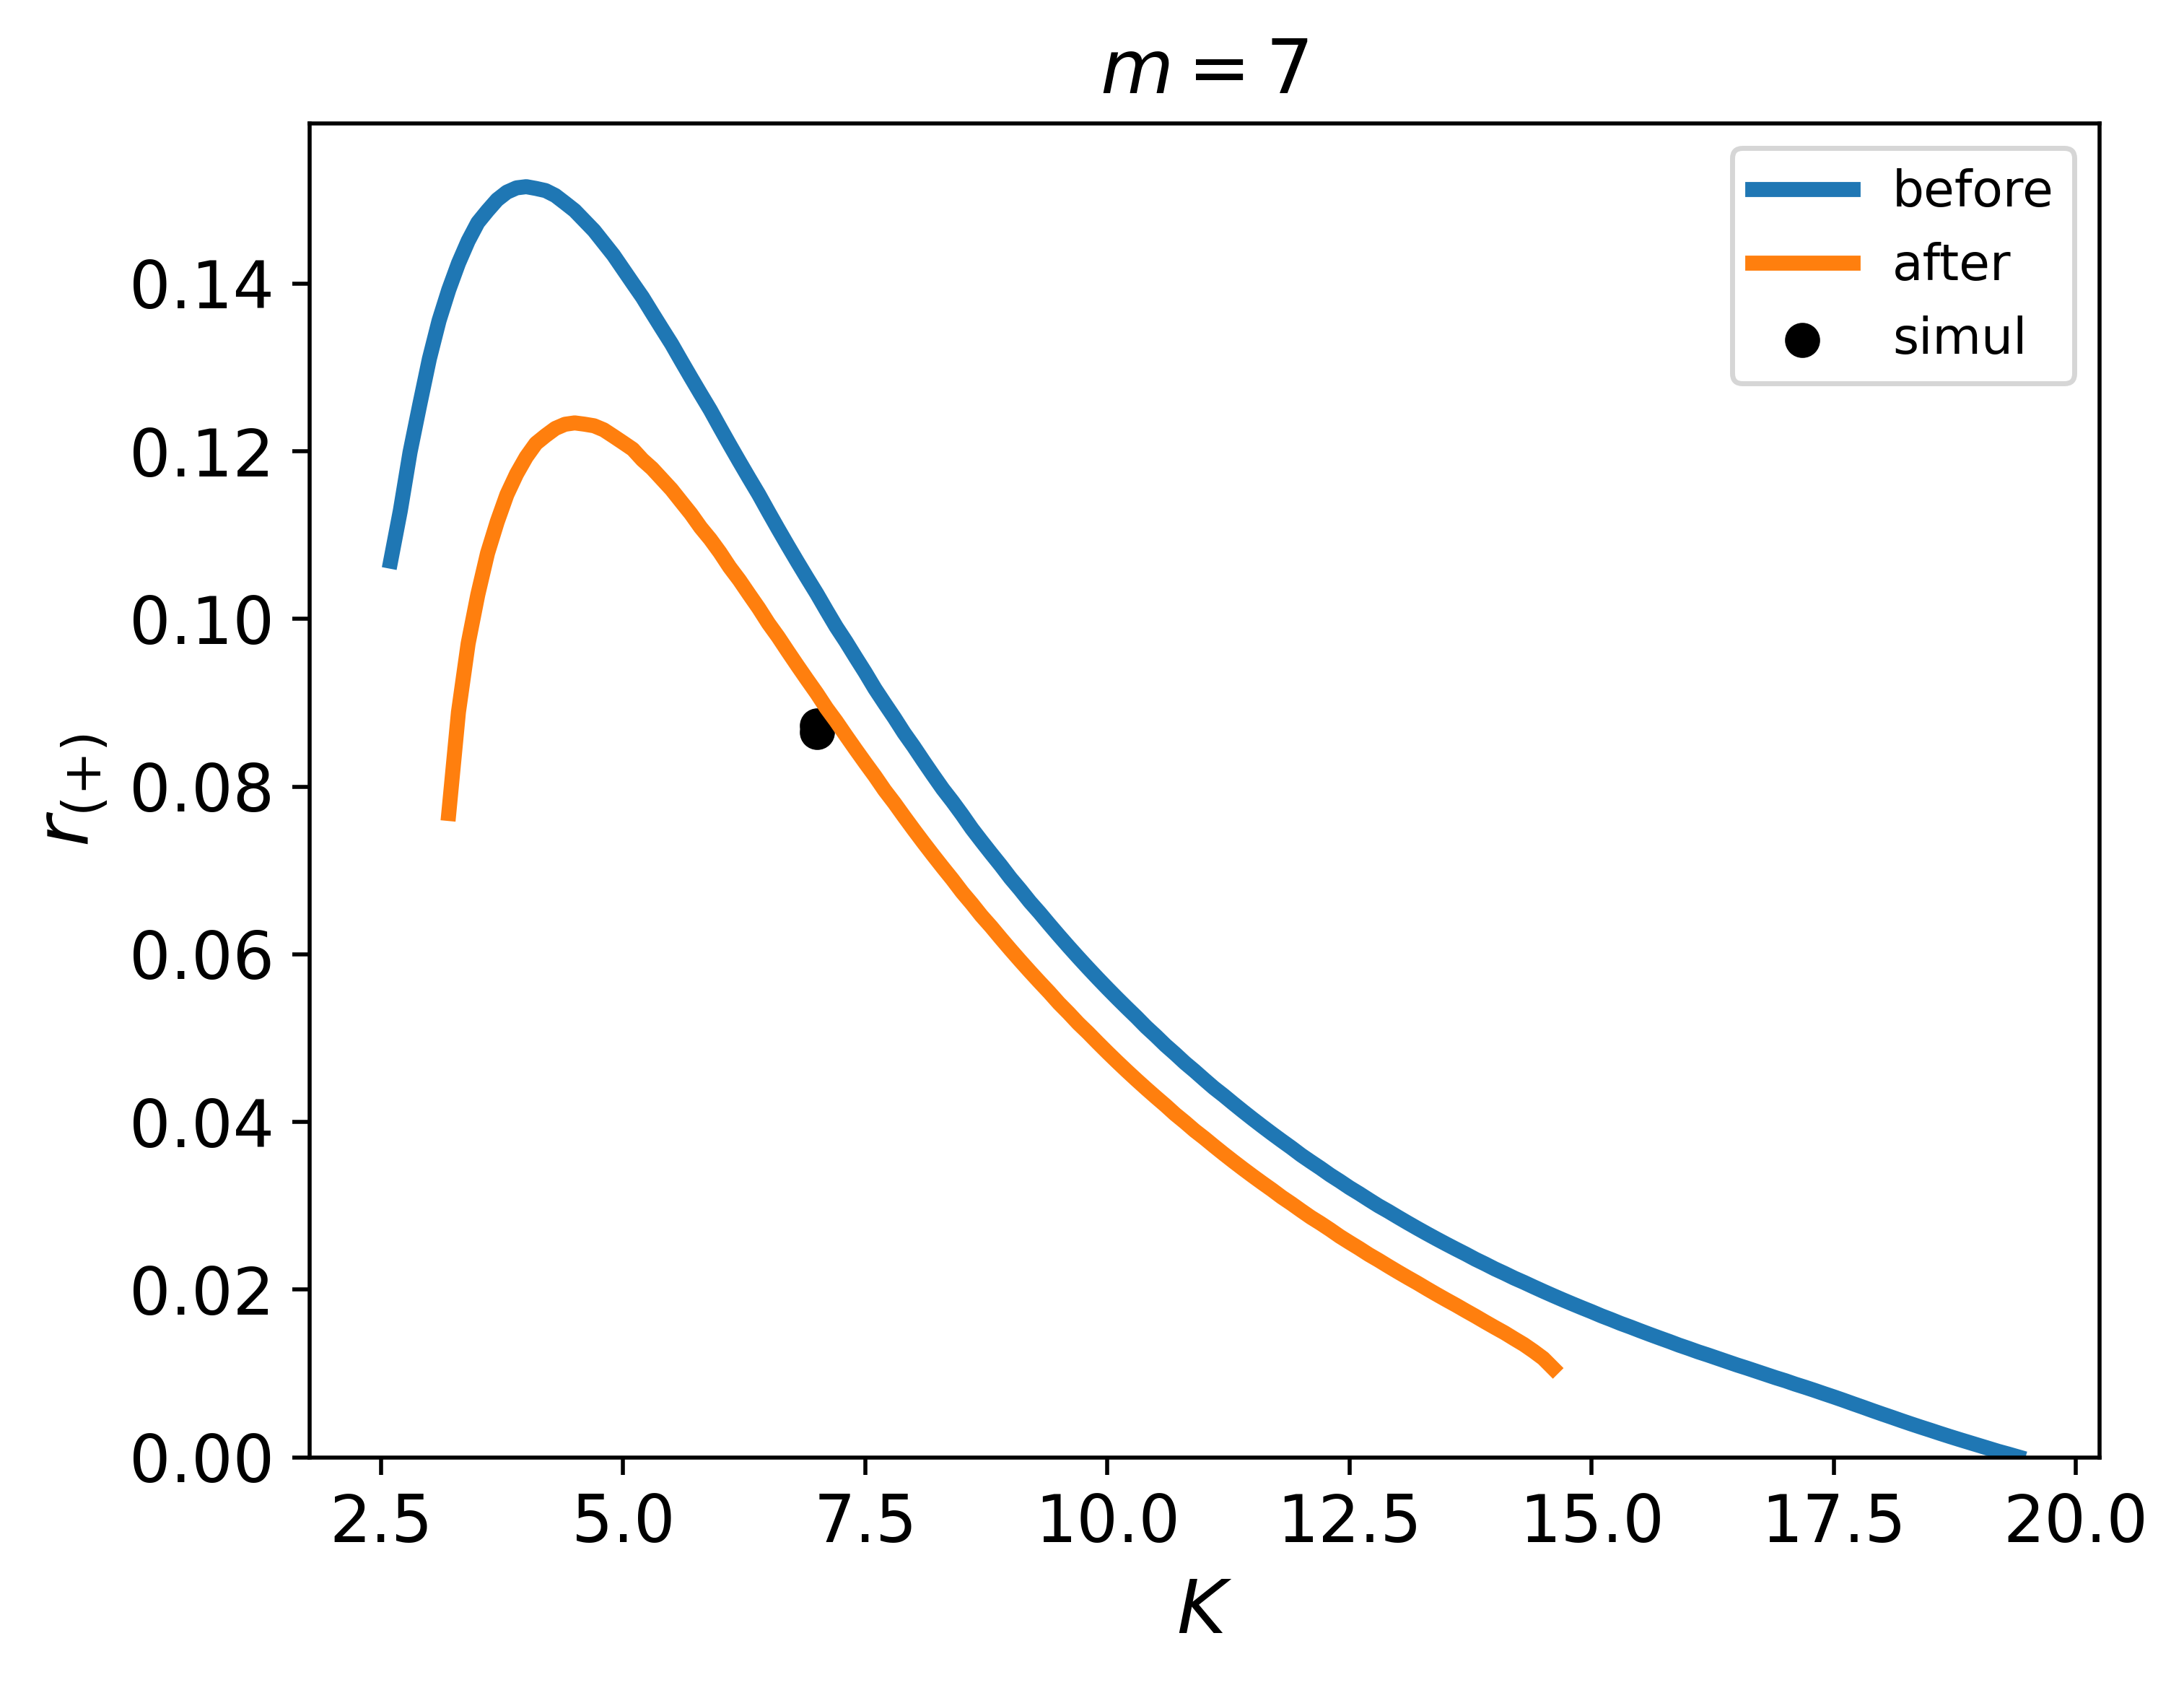

In [333]:
plt.figure(dpi=500)
plt.plot(Ks_,rp2,label=r'before',lw=3)
plt.plot(Ks_,rp3,label=r'after',lw=3)
plt.scatter(K,rp_,color='black',label='simul')
plt.scatter(K,rm_,color='black')
plt.legend()
plt.title(rf'$m={m}$',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylim(0,)

plt.xlabel(r'$K$',fontsize=15)
plt.ylabel(r'$r_{(+)}$',fontsize=15)


In [244]:
R.keys()

dict_keys([40000, 30000, 20000, 10000, 4000, 2000, 1500, 1000, 500, 250])

In [334]:
Ns = [250, 500, 1000, 1500, 2000, 4000, 10000, 20000, 30000, 40000]

In [338]:
RPs = []
RMs = []
R0s = []
for N in Ns:
    RPs.append(R[N]['+'])
    RMs.append(R[N]['-'])
    R0s.append(R[N]['0'])

In [339]:
np.savez(rf'Check_FSE/FSE K={K},m={m}',Ns=Ns,Rp=RPs,Rm=RMs,R0=R0s)

Text(0.5, 1.0, '$m=7, K=7$')

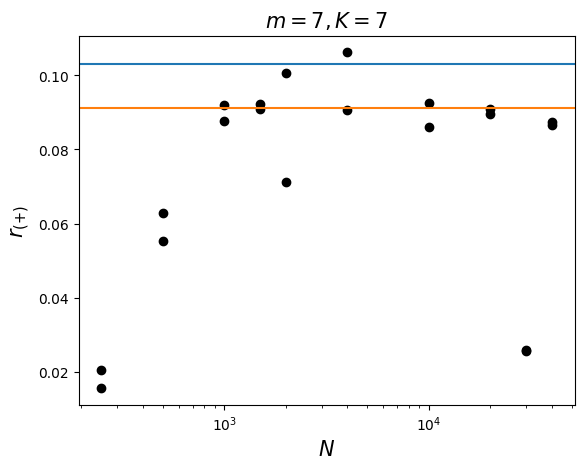

In [340]:
plt.axhline(F_Krp(K))
plt.axhline(F_Krp3(K),color='tab:orange')
plt.scatter(Ns,RPs,color='black')
plt.scatter(Ns,RMs,color='black')
plt.xlabel(r'$N$',fontsize=15)
plt.ylabel(r'$r_{(+)}$',fontsize=15)
plt.xscale('log')
plt.title(rf'$m={m}, K={K}$',fontsize=15)

## Check integration

In [1]:
from sympy import *

In [2]:
a,b,K,r,m,DO,D = symbols('a b K r m \Delta\Omega D')

In [3]:
DD = - Rational(1,2) * a/b * (a**2/(a**4+b**2))

In [395]:
a_sub = D/sqrt(K*r*m)
b_sub = D*DO/(K*r)

In [396]:
(DD.subs({a:a_sub,b:b_sub})*sqrt(K*r/m)).simplify()

-K*r*sqrt(K*r/m)*sqrt(K*m*r)/(2*\Delta\Omega*(D**2 + \Delta\Omega**2*m**2))